In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0,5.0)

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
path = '/drive/My Drive/Colab Notebooks/ODL Datas/Data_SLR.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,LSTAT,PRICE
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.shape

(506, 2)

In [ ]:
#price is dependent variable
#lstat is independent variable
x = df['LSTAT']
y = df['PRICE']

In [ ]:
x

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,LSTAT,PRICE
LSTAT,1.00,-0.74
PRICE,-0.74,1.00


In [1]:
x = x.values.reshape(-1,1)

NameError: ignored

In [ ]:
x

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

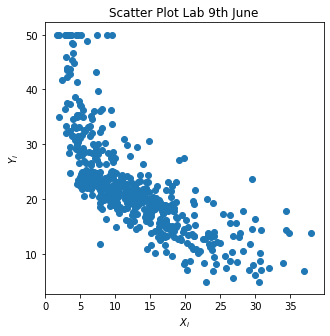

In [ ]:
#plot scatter plot
plt.scatter(x,y)
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.title("Scatter Plot Lab 9th June")
plt.show()

In [ ]:
train_test_split?

In [ ]:
#split data into train and test
#random_state=5
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 1)
(102, 1)
(404,)
(102,)


In [ ]:
#without random_state parameter in the tran_test_split dataset, 
#it will gather randomized data instead (i guess), so the result will be different each time when executed
y_test

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: PRICE, Length: 102, dtype: float64

Y = B0+B1X+e

In [ ]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train,y_train)

#to calc the R squared
R2 = model.score(x_test,y_test)
print("R squared: %.4f" %R2)

R squared: 0.5042


In [ ]:
model?

In [ ]:
model.score?

In [ ]:
model.intercept_

34.87291567862843

In [ ]:
model.coef_

array([-0.97981166])

In [ ]:
#to calc the b0 and b1 (y hat = bo+b1x = 34.87 -0.98x)
print ('intercept(b0):',model.intercept_)
print('slope(b1):',model.coef_)

intercept(b0): 34.87291567862843
slope(b1): [-0.97981166]


In [ ]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
model.predict?

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[31.80610519 30.26780089 26.24077499  0.80486439 28.42575498  8.77073316
 29.34677794 26.98543185 24.91802925 20.8028203  28.80788153 25.32955015
 25.10419347 28.0828209  27.29897158 22.458702    1.19678906 21.86101688
 14.15969727 24.96701983  5.79210572 23.97741006 30.81649542 24.72206692
 27.18139418 11.56319638 28.1416096  23.07598334 29.30758547 29.49374969
  9.9759015  11.38683028 18.8529951  18.47086855 26.37794862 22.86042477
 25.52551248 10.97530939 29.08222879 32.9328886  20.00917285  1.15759659
 27.42634709 16.2466961  27.63210754 28.92545893 -1.36051937 17.30489268
 21.05757133 11.20066607 21.06736944 22.3411246  26.11339947 14.94354659
 19.40168963 29.21940242 31.37498807 17.10893035 28.72949659 21.6944489
 20.83221465 24.96701983 18.02995331 30.37558018 23.62467787 15.50203924
 22.33132648 27.58311696 25.19237652 23.65407222 16.57003394 29.01364197
 18.99996685 15.49224112 22.98780029 30.46376323 20.73423348 13.85595565
 23.85003455 19.48987268 22.26273966 31.61994098 13.

In [ ]:
MSE = mean_squared_error(y_test,y_pred)
print("mean squared error: %.2f" % MSE)

mean squared error: 38.82


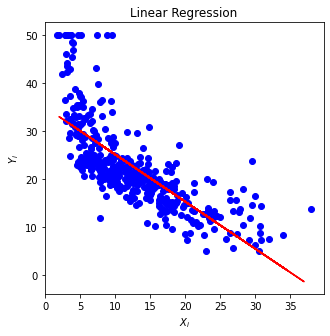

In [ ]:
#plot the fitted regression line
plt.scatter(x_train,y_train, color ="b")
plt.plot(x_test, y_pred,color="r")
plt.xlabel("$X_i$")
plt.ylabel("$Y_i$")
plt.title("Linear Regression")
plt.show()

In [ ]:
#stoohastic gradient descent(SGB) for linear regression
#random_state is only used in order to ensure that the answer is the same for everyone
#random_state will determine whether the randomized number generator will use a certain seed or not
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
model2 = SGDRegressor(random_state = 5)
model2.fit(x_train,y_train)

R2 = model2.score(x_test,y_test)
print("R squared: %.4f" % R2)
y_pred2 = model2.predict(x_test)

MSE = mean_squared_error(y_test,y_pred2)
print("mean squared error: %.2f" % MSE)
print("coefficients:", model2.coef_)
print("y intercept:",model2.intercept_)

R squared: 0.4981
mean squared error: 39.30
coefficients: [-0.96765327]
y intercept: [34.14419444]


In [ ]:
model2.get_params()


{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': 5,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model2?

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'loss':('squared_loss','huber'),'penalty':('l2','l1','elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1],
              'max_iter':[5000,10000,20000]}
model3 = SGDRegressor(random_state=5)
clf = GridSearchCV(model3,parameters)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=5, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('squared_loss', 'huber'),
                         'max_iter': [5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')},
            

In [ ]:
clf.estimator.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
clf.best_params_

{'alpha': 1e-06, 'loss': 'squared_loss', 'max_iter': 5000, 'penalty': 'l2'}

In [ ]:
#mean cross-validated score of the best estimator
clf.best_score_

0.5222649253930328

In [ ]:
clf.best_estimator_.intercept_

array([33.89415548])

In [ ]:
clf.best_estimator_.coef_

array([-0.95489552])